In [1]:
import matplotlib.pyplot as plt
from q_learning.algorithm import QLPolicy
from envs.env_creator import env_creator
from base_rl.eval_policy import EvalDiscreteStatePolicy
from glob import glob
import pandas as pd


In [2]:
plt.rcParams["figure.figsize"] = [20, 12]

In [3]:

device = 'cuda'
steps_per_episode = 1000
model_names = ['model_aeq-20bits2', 'model_final_h20bits3', 'model_h_c-20bits3', 'model_aeq-20bits', 'model_final_h20bits2', 'model_h_c-20bits2', 'model_final_h20bits', 'model_h_c-20bits']
experiment_id = '*'
experiment_type = 'mb_q_learning'
model_files = {model_name: glob(f'tmp/{experiment_type}/{experiment_id}/{model_name}/*' ) for model_name in model_names}
policy_class = QLPolicy


Tag: tmp/mb_q_learning/633045/model_h_c-20bits/x_interval_policy
Episode 9 Reward: -230.58506032708794 || New State Found: False


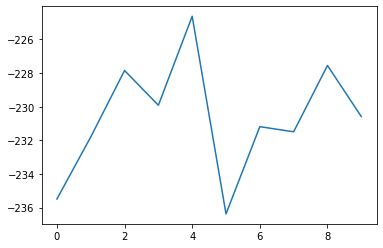

Reward Mean: -230.6867888859981
Reward std : 3.3602902003661272


In [4]:
from benchmarks.policy_benchmarks import PolicyBenchmarks

benchmarks = {}
evaluators = []
for model_name,policy_files in model_files.items():
    for policy_file in policy_files:
        eval_policy = policy_class.load(policy_file)
        env_kwargs = {'steps_per_episode': steps_per_episode, 'device': device,
                      'model_path': f'tmp/state_quantization/{model_name}'}
        evaluator = EvalDiscreteStatePolicy(policy=eval_policy, env_creator=env_creator, env_kwargs=env_kwargs, tag=policy_file.split('.')[0])
        evaluators.append(evaluator)

policy_benchmarks = PolicyBenchmarks(evaluators=evaluators, epochs=10)
policy_benchmarks.benchmark()

In [5]:
df = pd.DataFrame(policy_benchmarks.benchmark_metrics)
df.T

,reward,std,unique_obs
tmp/mb_q_learning/432429/model_aeq-20bits2/best_policy,-185.716806,1.081449,86.0
tmp/mb_q_learning/432429/model_aeq-20bits2/last_save_policy,-186.759073,0.730781,101.0
tmp/mb_q_learning/432429/model_aeq-20bits2/x_interval_policy,-186.965836,1.809434,104.0
tmp/mb_q_learning/432429/model_final_h20bits3/best_policy,-234.112045,0.578568,16.0
tmp/mb_q_learning/432429/model_final_h20bits3/last_save_policy,-233.925183,0.618390,18.0
tmp/mb_q_learning/432429/model_final_h20bits3/x_interval_policy,-234.047052,0.456232,17.0
tmp/mb_q_learning/432429/model_h_c-20bits3/best_policy,-236.015723,0.284193,15.0
tmp/mb_q_learning/432429/model_h_c-20bits3/last_save_policy,-237.569020,0.369606,21.0
tmp/mb_q_learning/432429/model_h_c-20bits3/x_interval_policy,-237.426840,0.482769,22.0
tmp/mb_q_learning/633045/model_aeq-20bits/best_policy,-201.932034,4.796177,24.0


In [6]:
model_files

{'model_aeq-20bits2': ['tmp/mb_q_learning/432429/model_aeq-20bits2/best_policy.pkl',
  'tmp/mb_q_learning/432429/model_aeq-20bits2/last_save_policy.pkl',
  'tmp/mb_q_learning/432429/model_aeq-20bits2/x_interval_policy.pkl'],
 'model_final_h20bits3': ['tmp/mb_q_learning/432429/model_final_h20bits3/best_policy.pkl',
  'tmp/mb_q_learning/432429/model_final_h20bits3/last_save_policy.pkl',
  'tmp/mb_q_learning/432429/model_final_h20bits3/x_interval_policy.pkl'],
 'model_h_c-20bits3': ['tmp/mb_q_learning/432429/model_h_c-20bits3/best_policy.pkl',
  'tmp/mb_q_learning/432429/model_h_c-20bits3/last_save_policy.pkl',
  'tmp/mb_q_learning/432429/model_h_c-20bits3/x_interval_policy.pkl'],
 'model_aeq-20bits': ['tmp/mb_q_learning/633045/model_aeq-20bits/best_policy.pkl',
  'tmp/mb_q_learning/633045/model_aeq-20bits/last_save_policy.pkl',
  'tmp/mb_q_learning/633045/model_aeq-20bits/x_interval_policy.pkl'],
 'model_final_h20bits2': ['tmp/mb_q_learning/708255/model_final_h20bits2/best_policy.pkl',
 